In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

In [7]:
df1 = pd.read_csv("../data/Lab2 D1A.csv")
df2 = pd.read_csv("../data/Lab2 D1B.csv")
df3 = pd.read_csv('../data/Lab2 D1C.csv')

In [8]:
display(df1.head())
display(df2.head())
display(df3.head())

,fid,name,population,county,latitude
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875


,name,population,county,longitude,level,enrollment,level.1
0,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary
1,SETON ACADEMY FOR GIRLS,57,BRISTOL,-71.147302,Elementary,49,Elementary
2,ST ANNA SCHOOL,157,WORCESTER,-71.751741,Elementary,143,Elementary
3,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,-71.083393,Elementary,4,Elementary
4,DEVEREUX SCHOOL,123,WORCESTER,-71.968419,Combined elementary and secondary,107,Combined elementary and secondary


,county,city,score
0,BRISTOL,SWANSEA,16
1,BRISTOL,FALL RIVER,8
2,WORCESTER,LEOMINSTER,14
3,PLYMOUTH,MIDDLEBORO,1
4,WORCESTER,RUTLAND,16


# Q1

In [9]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [10]:
merged_df = df1.merge(right=df2, how="inner", on=["name", "population", "county"])

In [11]:
display(merged_df.columns)
display(merged_df.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')

(27033, 9)

In [12]:
merged_A_C = df1.merge(right=df3, how="inner", on="county")

In [13]:
merged_A_C.head()

,fid,name,population,county,latitude,city,score
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,SWANSEA,16
1,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,FALL RIVER,8
2,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,NEW BEDFORD,8
3,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,MANSFIELD,14
4,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,ATTLEBORO,5


In [14]:
display(merged_A_C.shape)
display(merged_A_C.columns)

(4221333, 7)

Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')

# Q2

In [15]:
counties = [
    "Los Angeles County", "Cook County", "Harris County", "Maricopa County", "San Diego County",
    "Orange County", "Miami-Dade County", "Dallas County", "Kings County", "Riverside County",
    "Queens County", "Clark County", "Tarrant County", "Santa Clara County", "Broward County",
    "Bexar County", "Wayne County", "Alameda County", "Middlesex County", "Sacramento County",
    "Philadelphia County", "Allegheny County", "Fresno County", "Hillsborough County", "New York County",
    "Palm Beach County", "Cuyahoga County", "Honolulu County", "Travis County", "Fairfax County",
    "Hennepin County", "Salt Lake County", "Nassau County", "DuPage County", "Oakland County",
    "Orange County (FL)", "Montgomery County (MD)", "El Paso County", "Baltimore County", "Miami County (OH)",
    "King County (WA)", "Milwaukee County", "Wake County", "Tulsa County", "Pima County",
    "Bergen County", "Fulton County", "Gloucester County", "San Bernardino County", "Hudson County"
]


sizes = ["small", "medium", "high"]
cardinal_directions = ["North", "South", "East", "West"]
Timings = ["full time", "part time"]
conditions = ["excellent", "fine", "abysmal"]
designations = ["janitor", "manager", "team lead"]

size_data = [sizes[np.random.randint(0,3)] for i in range(50)]
CD_data = [cardinal_directions[np.random.randint(0,4)] for i in range(50)]
Timing_data = [Timings[np.random.randint(0,2)] for i in range(50)]
condition_data = [conditions[np.random.randint(0,3)] for i in range(50)]
designation_data = [designations[np.random.randint(0,3)] for i in range(50)]

dictionary = {
    "county": counties,
    "size": size_data,
    "cardinal direction": CD_data,
    "timing": Timing_data,
    "condition": condition_data,
    "designation": designation_data
}

new_df = pd.DataFrame(dictionary)
new_df

,county,size,cardinal direction,timing,condition,designation
0,Los Angeles County,medium,West,part time,fine,manager
1,Cook County,medium,East,full time,excellent,janitor
2,Harris County,small,North,part time,abysmal,janitor
3,Maricopa County,high,West,full time,excellent,janitor
4,San Diego County,high,North,part time,abysmal,manager
5,Orange County,small,West,part time,excellent,janitor
6,Miami-Dade County,high,West,part time,fine,janitor
7,Dallas County,small,North,full time,excellent,team lead
8,Kings County,high,South,full time,fine,janitor
9,Riverside County,small,East,full time,fine,manager


In [18]:
print("Before: ")
display(new_df.shape)
display(new_df.columns)

Before: 


(50, 6)

Index(['county', 'size', 'cardinal direction', 'timing', 'condition',
       'designation'],
      dtype='object')

In [17]:
modifiedData = pd.merge(left=merged_df, right=merged_A_C, how="inner", on=list(set(merged_df.columns) & set(merged_A_C.columns)))
modifiedData = modifiedData.merge(right=new_df, how="inner", on=list(set(modifiedData) & set(new_df)))

In [19]:
print("After: ")
display(modifiedData.shape)
display(modifiedData.columns)

After: 


(0, 16)

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1', 'city', 'score', 'size', 'cardinal direction',
       'timing', 'condition', 'designation'],
      dtype='object')

# Q3

In [22]:
df = pd.read_csv("../data/train.csv")

In [23]:
display(df.shape)
display(df.columns)
display(df.head())

(76020, 371)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [24]:
display(df[["var3", "var38", "var15", "imp_op_var39_comer_ult1"]].corr())

,var3,var38,var15,imp_op_var39_comer_ult1
var3,1.000000,0.000071,-0.004452,0.005989
var38,0.000071,1.000000,0.006497,0.012546
var15,-0.004452,0.006497,1.000000,0.094762
imp_op_var39_comer_ult1,0.005989,0.012546,0.094762,1.000000


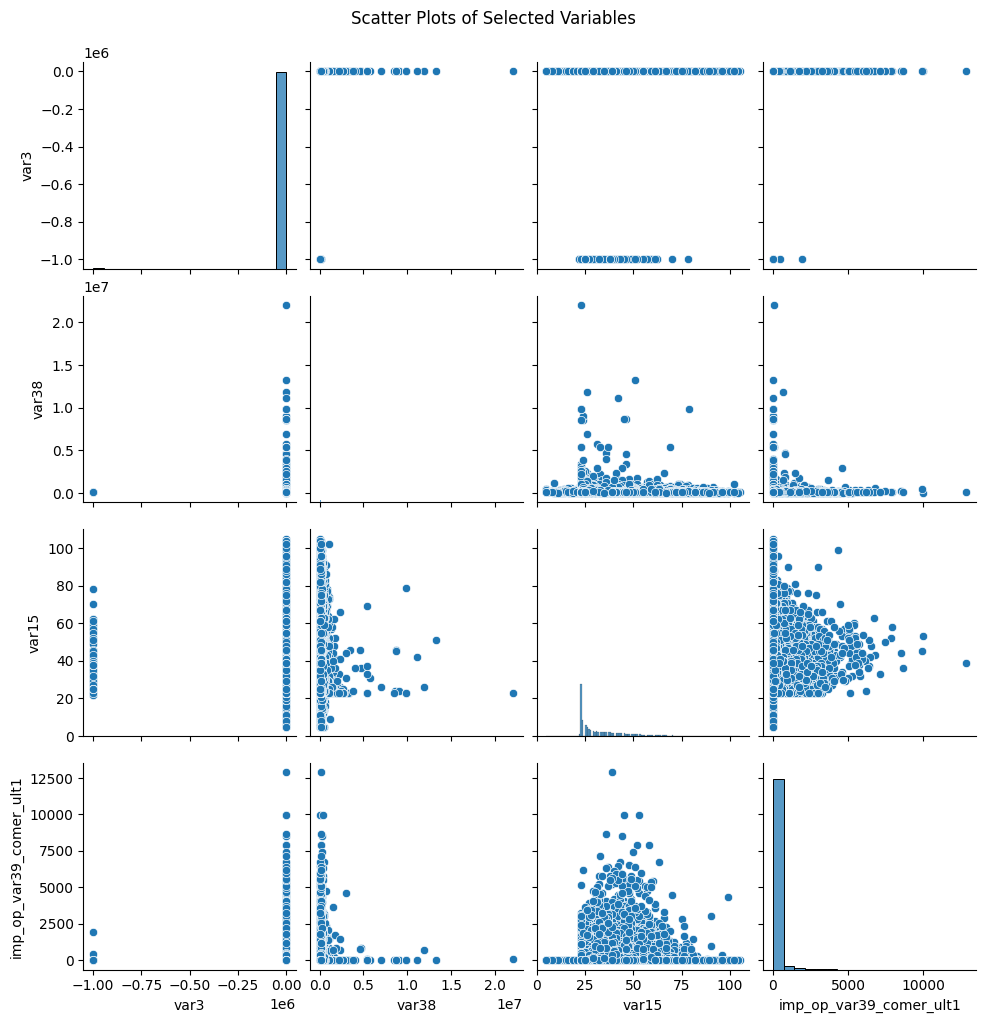

In [27]:
data = df[["var3", "var38", "var15", "imp_op_var39_comer_ult1"]]
sns.pairplot(data)
plt.suptitle("Scatter Plots of Selected Variables", y=1.02)
plt.show()

Data is not linear because none of the graph shows a linear relationship between any of the data

In [29]:
mean_imp = SimpleImputer(strategy="mean")
df_imputed = mean_imp.fit_transform(df)

#### Does Var38 have low values on avg

<Figure size 800x500 with 0 Axes>

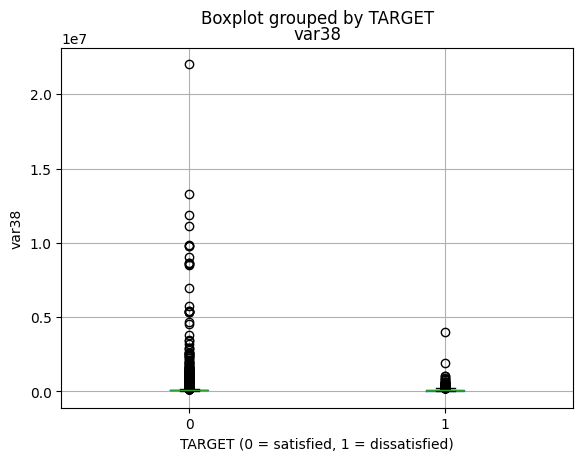

In [32]:
plt.figure(figsize=(8,5))
df.boxplot(column='var38', by='TARGET')
plt.xlabel("TARGET (0 = satisfied, 1 = dissatisfied)")
plt.ylabel("var38")
plt.show()

#### Is there a relationship between var15 and dissatisfaction?

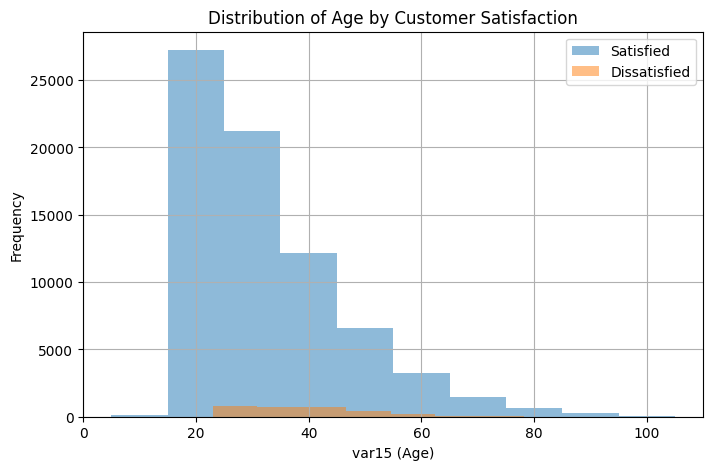

In [33]:
plt.figure(figsize=(8,5))
df[df['TARGET']==0]['var15'].hist(alpha=0.5, label='Satisfied')
df[df['TARGET']==1]['var15'].hist(alpha=0.5, label='Dissatisfied')
plt.legend()
plt.xlabel("var15 (Age)")
plt.ylabel("Frequency")
plt.title("Distribution of Age by Customer Satisfaction")
plt.show()

#### Are higher imp_op_var39_comer_ult1 values linked with dissatisfaction?

<Figure size 800x500 with 0 Axes>

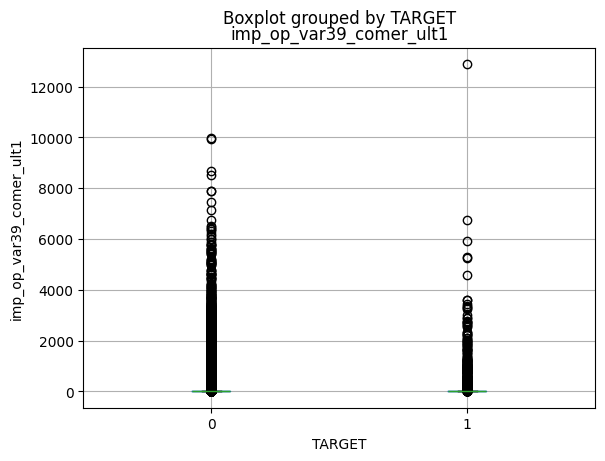

In [38]:
plt.figure(figsize=(8,5))
df.boxplot(column='imp_op_var39_comer_ult1', by='TARGET')
plt.xlabel("TARGET")
plt.ylabel("imp_op_var39_comer_ult1")
plt.show()

#### Relationship between var3 and dissatisfaction

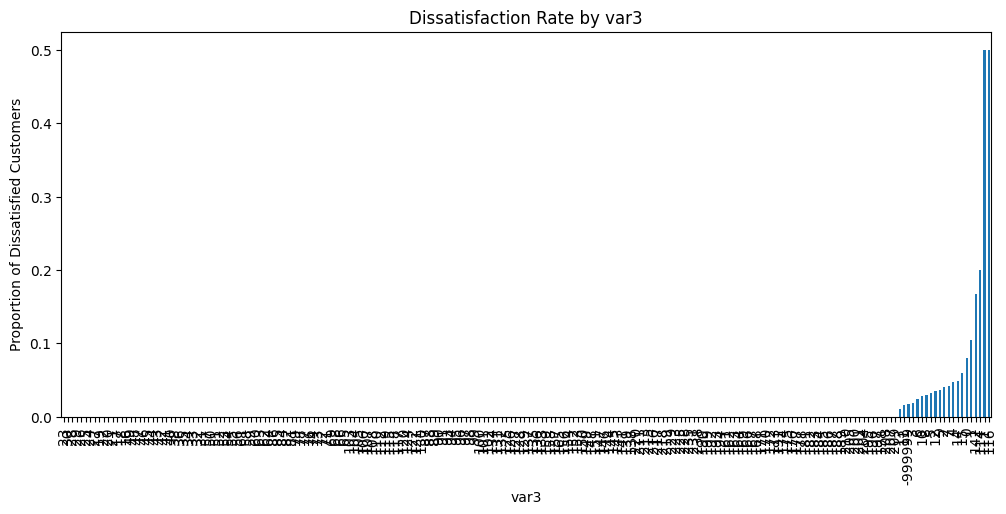

In [39]:
var3_target = df.groupby('var3')['TARGET'].mean().sort_values()

plt.figure(figsize=(12,5))
var3_target.plot(kind='bar')
plt.ylabel("Proportion of Dissatisfied Customers")
plt.title("Dissatisfaction Rate by var3")
plt.show()

#### Multivariate Exploration – Interaction Between var15 and var38

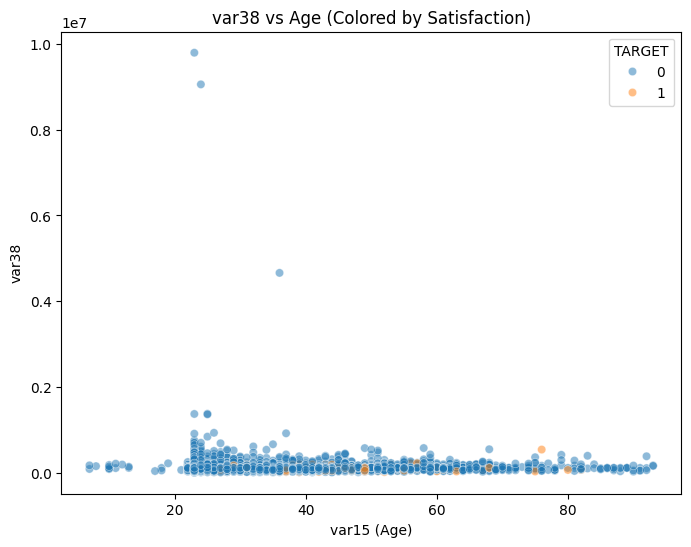

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(5000), x='var15', y='var38', hue='TARGET', alpha=0.5)
plt.title("var38 vs Age (Colored by Satisfaction)")
plt.xlabel("var15 (Age)")
plt.ylabel("var38")
plt.show()

Unique categories in TARGET: [0 1]


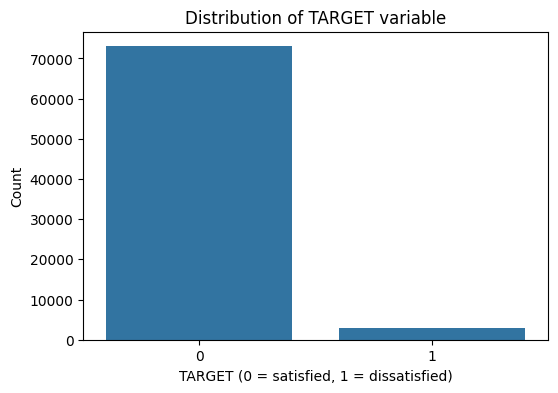

In [44]:
unique_values = df['TARGET'].unique()
print("Unique categories in TARGET:", unique_values)

target_counts = df['TARGET'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(target_counts)
plt.title("Distribution of TARGET variable")
plt.xlabel("TARGET (0 = satisfied, 1 = dissatisfied)")
plt.ylabel("Count")
plt.show()

In [46]:
X = df.drop(labels="TARGET", axis=1)
y = df['TARGET']

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X, y)

# Q4

## A:<br>
##### age — “what is your age?”
##### tenure_years — “how many years have you been our customer?” 
##### primary_channel — “which channel do you use most often? (branch, mobile app, website, call center, atm)” 
##### service_rating — “rate your overall service (1=very poor … 5=excellent)” 
##### nps — “how likely are you to recommend us? (0–10)”
###### optional (answer if comfortable):
###### 6) monthly_balance — “average monthly account balance (approx.)”
###### 7) num_products — “how many products do you use with us? (accounts/loans/cards/etc.)”
###### 8) branch_visits_last_month — “how many branch visits last month?”
###### 9) app_logins_last_month — “how many mobile-app logins last month?”
###### 10) complaints_last_year — “how many complaints/support tickets in the last year?”
###### 11) region — “which region? (north/south/east/west/central)”
###### 12) has_credit_card — “do you have our credit card? (yes/no)”
###### 13) commercial_ops_amount_last_month — “total commercial transaction amount last month (if any)”

In [47]:
df = pd.read_csv("../data/Lab2Q4.csv")

In [48]:
df.head()

,age,tenure_years,primary_channel,service_rating,nps,monthly_balance,num_products,branch_visits_last_month,app_logins_last_month,complaints_last_year,region,has_credit_card,commercial_ops_amount_last_month
0,42,5,mobile app,4,8,12500,3,1,15,0,south,yes,0
1,67,12,branch,3,6,28700,2,3,2,1,north,no,0
2,29,2,mobile app,5,10,8500,4,0,28,0,east,yes,0
3,35,7,website,4,9,15300,3,0,12,0,central,yes,1250
4,58,20,call center,2,3,45200,1,0,1,2,west,no,0


In [49]:
df['primary_channel'].value_counts()

primary_channel
mobile app     46
branch         18
website        17
call center     9
atm             9
Name: count, dtype: int64

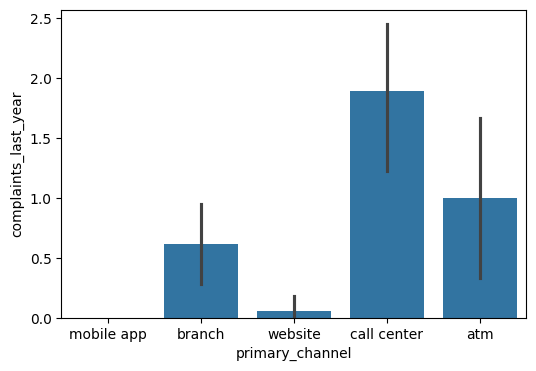

In [53]:
plt.figure(figsize=(6, 4))
sns.barplot(df, x="primary_channel", y="complaints_last_year")
plt.show()

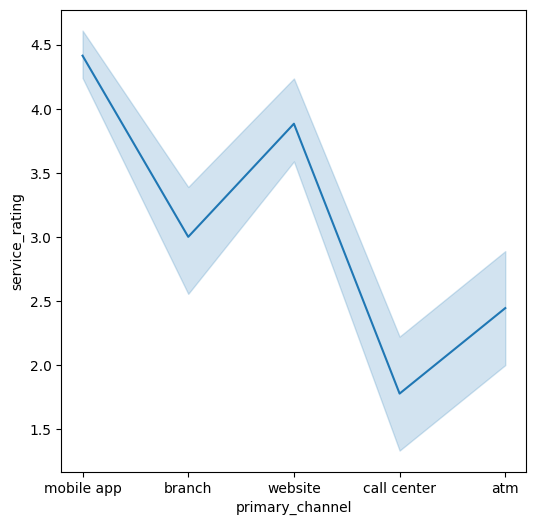

In [54]:
plt.figure(figsize=(6, 6))
sns.lineplot(df, x="primary_channel", y="service_rating")
plt.show()

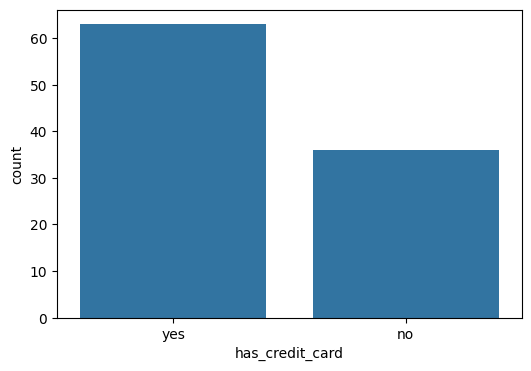

In [56]:
has_credit_card_count = df["has_credit_card"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(has_credit_card_count)
plt.show()

In [62]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

#### Difference between One-Hot and Dummy:
#### One Hot creates a new binary column for every single category in the original feature while Dummy creates a new binary column for every category except one. The omitted category is known as the base category or reference category.

In [63]:
X = df_encoded.drop(labels="has_credit_card", axis=1)
y = df_encoded['has_credit_card']

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X, y)